In [1]:
###################################################
### code chunk number 1: lib
###################################################
library(KEGGgraph)


Attaching package: 'KEGGgraph'


The following object is masked from 'package:graphics':

    plot


The following object is masked from 'package:base':

    plot




In [2]:
###################################################
### code chunk number 2: remoteRetrieval (eval = FALSE)
###################################################
## tmp <- tempfile()
## pName <- "p53 signaling pathway"
## data(KEGGPATHNAME2ID)
## pId <- mget(pName, KEGGPATHNAME2ID)[[1]]
## retrieveKGML(pId, organism="cel", destfile=tmp, method="wget", quiet=TRUE)

In [3]:
###################################################
### code chunk number 3: library
###################################################
mapkKGML <- system.file("extdata/hsa04010.xml",
                     package="KEGGgraph")

In [4]:
###################################################
### code chunk number 4: parsemapk
###################################################
mapkG <- parseKGML2Graph(mapkKGML,expandGenes=TRUE)
mapkG

A graphNEL graph with directed edges
Number of Nodes = 265 
Number of Edges = 876 

In [5]:
###################################################
### code chunk number 5: parsemapk2
###################################################
mapkpathway <- parseKGML(mapkKGML)
mapkpathway
mapkG2 <- KEGGpathway2Graph(mapkpathway, expandGenes=TRUE)
mapkG2

KEGG Pathway
[ Title ]: MAPK signaling pathway
[ Name ]: path:hsa04010
[ Organism ]: hsa
[ Number ] :04010
[ Image ] :http://www.genome.jp/kegg/pathway/hsa/hsa04010.gif
[ Link ] :http://www.genome.jp/dbget-bin/show_pathway?hsa04010
------------------------------------------------------------
Statistics:
	136 node(s)
	171 edge(s)
	0 reaction(s)
------------------------------------------------------------

A graphNEL graph with directed edges
Number of Nodes = 265 
Number of Edges = 876 

In [6]:
###################################################
### code chunk number 6: nodeandedge
###################################################
mapkNodes <- nodes(mapkG)
nodes(mapkG)[1:3]
mapkEdges <- edges(mapkG)
edges(mapkG)[1]

[1] "hsa:5923"  "hsa:5924"  "hsa:11072"

$`hsa:5923`
[1] "hsa:22800" "hsa:22808" "hsa:3265"  "hsa:3845"  "hsa:4893"  "hsa:6237"

In [7]:
###################################################
### code chunk number 7: keggnodedata
###################################################
mapkGnodedata <- getKEGGnodeData(mapkG)
mapkGnodedata[[2]]

KEGG Node (Entry 'hsa:5924'):
------------------------------------------------------------
[ displayName ]: RASGRF1, GRF1...
[ Name ]: hsa:5924
[ Type ]: gene
[ Link ]: http://www.genome.jp/dbget-bin/www_bget?hsa+5923+5924
------------------------------------------------------------

In [8]:
###################################################
### code chunk number 8: keggnodedataalt (eval = FALSE)
###################################################
getKEGGnodeData(mapkG, 'hsa:5924')

KEGG Node (Entry 'hsa:5924'):
------------------------------------------------------------
[ displayName ]: RASGRF1, GRF1...
[ Name ]: hsa:5924
[ Type ]: gene
[ Link ]: http://www.genome.jp/dbget-bin/www_bget?hsa+5923+5924
------------------------------------------------------------

In [9]:
###################################################
### code chunk number 9: keggedgedata
###################################################
mapkGedgedata <- getKEGGedgeData(mapkG)
mapkGedgedata[[4]]

  KEGG Edge (Type: PPrel):
------------------------------------------------------------
[ Entry 1 ID ]: hsa:5923
[ Entry 2 ID ]: hsa:3845
[ Subtype ]: 
  [ Subtype name ]: activation
  [ Subtype value ]: -->
------------------------------------------------------------

In [10]:
###################################################
### code chunk number 10: keggedgedataalt (eval = FALSE)
###################################################
getKEGGedgeData(mapkG,'hsa:627~hsa:4915')

  KEGG Edge (Type: PPrel):
------------------------------------------------------------
[ Entry 1 ID ]: hsa:627
[ Entry 2 ID ]: hsa:4915
[ Subtype ]: 
  [ Subtype name ]: activation
  [ Subtype value ]: -->
------------------------------------------------------------

In [11]:
###################################################
### code chunk number 11: inout
###################################################
mapkGoutdegrees <- sapply(edges(mapkG), length)
mapkGindegrees <- sapply(inEdges(mapkG), length)
topouts <- sort(mapkGoutdegrees, decreasing=T)
topins <- sort(mapkGindegrees, decreasing=T)
topouts[1:3]
topins[1:3]

hsa:5594 hsa:5595 hsa:1432 
      26       26       13

hsa:5923  hsa:5924 hsa:10125 
       26        26        26

In [12]:
###################################################
### code chunk number 12: subsetprepare
###################################################
library(Rgraphviz)
set.seed(123)
randomNodes <- sample(nodes(mapkG), 25)
mapkGsub <- subGraph(randomNodes, mapkG)
mapkGsub

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: grid



A graphNEL graph with directed edges
Number of Nodes = 25 
Number of Edges = 6 

In [13]:
###################################################
### code chunk number 13: makeattr
###################################################
makeAttr <- function(graph, default, valNodeList) {
  tmp <- nodes(graph)
  x <- rep(default, length(tmp)); names(x) <- tmp
  
  if(!missing(valNodeList)) {
    stopifnot(is.list(valNodeList))
    allnodes <- unlist(valNodeList)
    stopifnot(all(allnodes %in% tmp))
    for(i in seq(valNodeList)) {
      x[valNodeList[[i]]] <- names(valNodeList)[i]
    }
  }
  return(x)
}

Loading required package: org.Hs.eg.db

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'org.Hs.eg.db'"


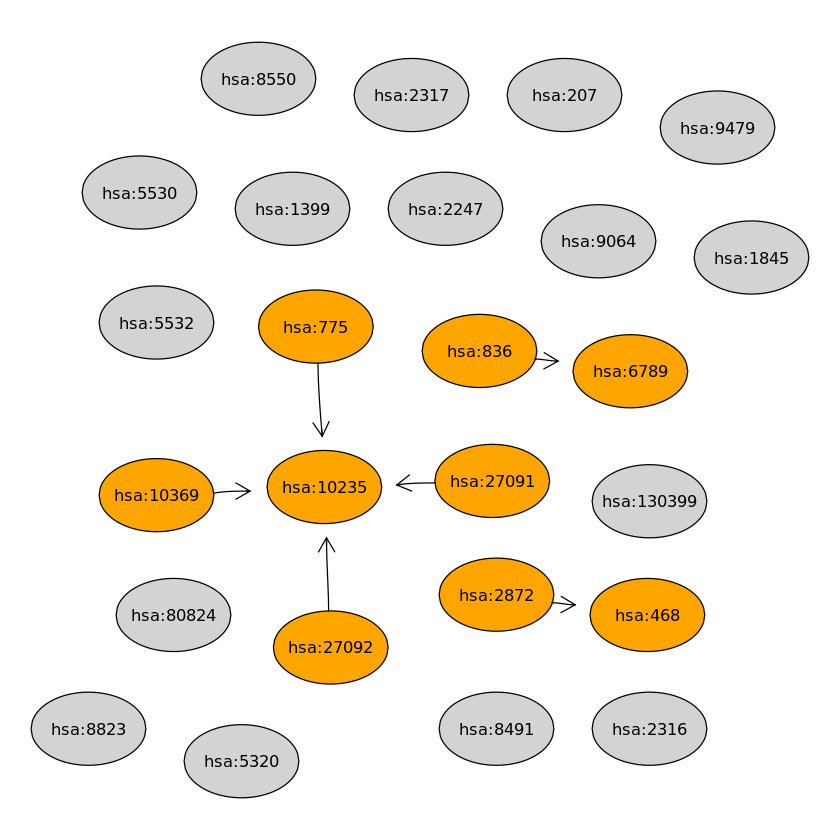

In [14]:
###################################################
### code chunk number 14: subsetplot
###################################################
outs <- sapply(edges(mapkGsub), length) > 0
ins <- sapply(inEdges(mapkGsub), length) > 0
ios <- outs | ins

## translate the KEGG IDs into Gene Symbol
if(require(org.Hs.eg.db)) {
  ioGeneID <- translateKEGGID2GeneID(names(ios))
  nodesNames <- sapply(mget(ioGeneID, org.Hs.egSYMBOL, ifnotfound=NA), "[[",1)
} else {
  nodesNames <- names(ios)
}
names(nodesNames) <- names(ios)

nAttrs <- list();
nAttrs$fillcolor <- makeAttr(mapkGsub, "lightgrey", list(orange=names(ios)[ios]))
nAttrs$label <- nodesNames
plot(mapkGsub, "neato", nodeAttrs=nAttrs,
     attrs=list(node=list(fillcolor="lightgreen",
                  width="0.75", shape="ellipse"), 
       edge=list(arrowsize="0.7")))

In [15]:
###################################################
### code chunk number 15: mergedemo
###################################################
wntKGML <- system.file("extdata/hsa04310.xml",package="KEGGgraph")
wntG <- parseKGML2Graph(wntKGML)
graphs <- list(mapk=mapkG, wnt=wntG)
merged <- mergeGraphs(graphs)
merged

A graphNEL graph with directed edges
Number of Nodes = 386 
Number of Edges = 1628 

In [16]:
###################################################
### code chunk number 16: bcc (eval = FALSE)
###################################################
# library(RBGL)
# bcc <- brandes.betweenness.centrality(mapkG)
# rbccs <- bcc$relative.betweenness.centrality.vertices[1L,]
# toprbccs <- sort(rbccs,decreasing=TRUE)[1:4]
# toprbccs

ERROR: Error in library(RBGL): there is no package called 'RBGL'


In [17]:
###################################################
### code chunk number 17: bccplot (eval = FALSE)
###################################################
# toprbccName <- names(toprbccs)
# toprin <- sapply(toprbccName, function(x) inEdges(mapkG)[x])
# toprout <- sapply(toprbccName, function(x) edges(mapkG)[x])
# toprSubnodes <- unique(unname(c(unlist(toprin), unlist(toprout), toprbccName)))
# toprSub <- subGraph(toprSubnodes, mapkG)

# nAttrs <- list()
# tops <- c("MAPK3K1","GRB2","MAP2K2","MAP2K1")
# topLabels <- lapply(toprbccName, function(x) x); names(topLabels) <- tops
# nAttrs$label <- makeAttr(toprSub, "", topLabels)
# nAttrs$fillcolor <- makeAttr(toprSub, "lightblue", list(orange=toprbccName))
# nAttrs$width <- makeAttr(toprSub,"",list("0.8"=toprbccName))

# plot(toprSub, "twopi", nodeAttrs=nAttrs, attrs=list(graph=list(start=2)))

ERROR: Error in eval(expr, envir, enclos): object 'toprbccs' not found


In [18]:
###################################################
### code chunk number 18: help (eval = FALSE)
###################################################
help(package=KEGGgraph)

Documentation for package 'KEGGgraph'


		Information on package 'KEGGgraph'

Description:

Package:                KEGGgraph
Type:                   Package
Title:                  KEGGgraph: A graph approach to KEGG PATHWAY in
                        R and Bioconductor
Version:                1.56.0
Date:                   2021-02-01
Author:                 Jitao David Zhang, with inputs from Paul
                        Shannon
Maintainer:             Jitao David Zhang <jitao_david.zhang@roche.com>
Description:            KEGGGraph is an interface between KEGG pathway
                        and graph object as well as a collection of
                        tools to analyze, dissect and visualize these
                        graphs. It parses the regularly updated KGML
                        (KEGG XML) files into graph models maintaining
                        all essential pathway attributes. The package
                        offers functionalities including parsing, graph
  

In [19]:
###################################################
### code chunk number 19: reactionexample
###################################################
mapfile <-  system.file("extdata/map00260.xml",package="KEGGgraph")
map <- parseKGML(mapfile)
map
reactions <- getReactions(map)
reactions[[1]]

KEGG Pathway
[ Title ]: Glycine, serine and threonine metabolism
[ Name ]: path:map00260
[ Organism ]: map
[ Number ] :00260
[ Image ] :http://www.genome.jp/kegg/pathway/map/map00260.gif
[ Link ] :http://www.genome.jp/dbget-bin/show_pathway?map00260
------------------------------------------------------------
Statistics:
	144 node(s)
	371 edge(s)
	68 reaction(s)
------------------------------------------------------------

KEGG Reaction(rn:R08211)
------------------------------------------------------------
[ Name ]: rn:R08211
[ Type ]: irreversible
[ Substrate Name ]: cpd:C00576
[ Product Name ]: cpd:C00719

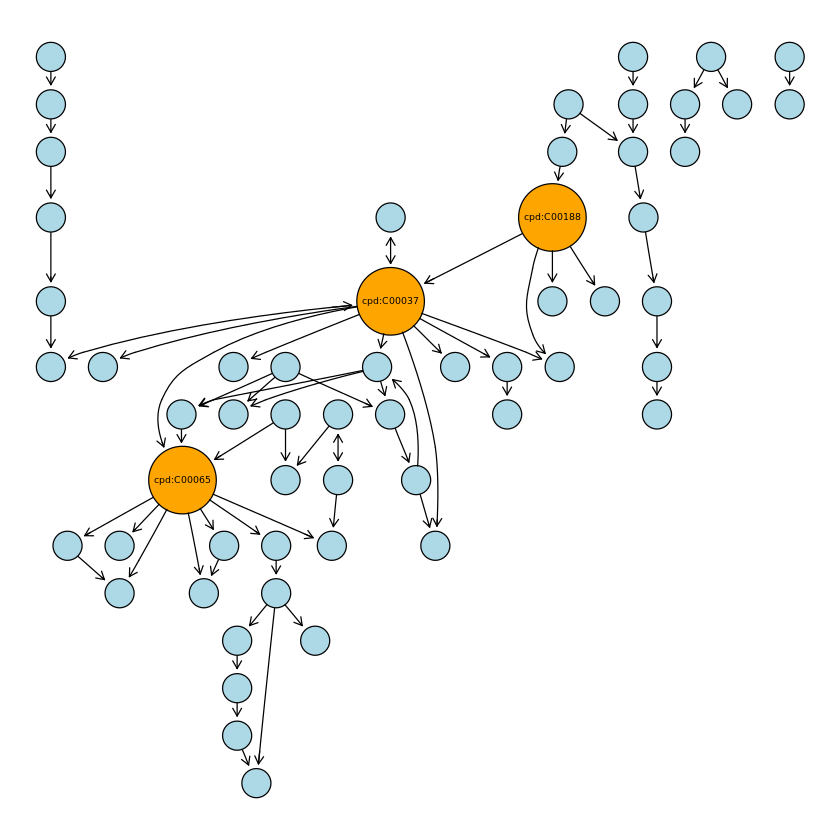

In [20]:
###################################################
### code chunk number 20: cnexample
###################################################
chemicalGraph <- KEGGpathway2reactionGraph(map)

outDegrees <- sapply(edges(chemicalGraph), length)
maxout <- names(sort(outDegrees,decreasing=TRUE))[1:3]

nAttrs <- list()
maxoutlabel <- as.list(maxout); names(maxoutlabel) <- maxout
nAttrs$label <- makeAttr(chemicalGraph, "", maxoutlabel)
nAttrs$fillcolor <- makeAttr(chemicalGraph, "lightblue", list(orange=maxout))
nAttrs$width <- makeAttr(chemicalGraph,"0.8", list("1.8"=maxout))
plot(chemicalGraph, nodeAttrs=nAttrs)

In [21]:
###################################################
### code chunk number 21: mapk14expand (eval = FALSE)
###################################################
mapkGembed <- parseKGMLexpandMaps(mapkKGML)

In [22]:
###################################################
### code chunk number 22: subgraphbynode
###################################################
mapkGall <- parseKGML2Graph(mapkKGML,genesOnly=FALSE)
mapkGall
mapkGsub <- subGraphByNodeType(mapkGall, "gene")
mapkGsub

A graphNEL graph with directed edges
Number of Nodes = 277 
Number of Edges = 891 

A graphNEL graph with directed edges
Number of Nodes = 265 
Number of Edges = 876 

In [23]:
###################################################
### code chunk number 23: biomart (eval = FALSE)
###################################################
# toprbccKEGGID <- names(toprbccs)
# toprbccKEGGID
# toprbccGeneID <- translateKEGGID2GeneID(toprbccKEGGID)
# toprbccGeneID

ERROR: Error in eval(expr, envir, enclos): object 'toprbccs' not found


In [24]:
###################################################
### code chunk number 24: orgHuman (eval = FALSE)
###################################################
if(require(org.Hs.eg.db)) {
  tnodes <- nodes(toprSub)
  tgeneids <- translateKEGGID2GeneID(tnodes)
  tgenesymbols <- sapply(mget(tgeneids, org.Hs.egSYMBOL, ifnotfound=NA), "[[",1)
  toprSubSymbol <- toprSub
  nodes(toprSubSymbol) <- tgenesymbols
  plot(toprSubSymbol, "neato",attrs=list(node=list(font=5, fillcolor="lightblue")))
}

Loading required package: org.Hs.eg.db

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'org.Hs.eg.db'"


In [25]:
#################################################
# code chunk number 25: biomart2 (eval = FALSE)
#################################################
# library(biomaRt)
# hsapiens <- useMart("ensembl","hsapiens_gene_ensembl" )
# filters <- listFilters(hsapiens)
# getBM(attributes=c("entrezgene","hgnc_symbol"), 
#       filters="entrezgene", 
#       values=toprbccGeneID, mart=hsapiens)

ERROR: Error in library(biomaRt): there is no package called 'biomaRt'


In [26]:
###################################################
### code chunk number 26: sessionInfo
###################################################
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
[1] C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] Rgraphviz_2.40.0    graph_1.74.0        BiocGenerics_0.42.0
[4] KEGGgraph_1.56.0   

loaded via a namespace (and not attached):
 [1] uuid_1.1-0      rlang_1.0.2     fastmap_1.1.0   fansi_1.0.3    
 [5] tools_4.2.0     utf8_1.2.2      cli_3.3.0       htmltools_0.5.2
 [9] ellipsis_0.3.2  digest_0.6.29   lifecycle_1.0.1 crayon_1.5.1   
[13] IRdisplay_1.1   repr_1.1.4      bitops_1.0-7    base64enc_0.1-3
[17] vctrs_0.4.1     RCurl_1.98-1.6  IRkernel_1.3    glue_1.6.2     
[21] evaluate_0.15   pbdZMQ_0.3-7    compiler_4.2.0  pillar_1.7.0   
[25] stats4_4.2.0    XML_3.99-0.9    jsonlite_1.8.0 